In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set random seed for reproducibility
torch.manual_seed(42)

In [3]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [4]:
# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [5]:
!ls data/MNIST/raw

t10k-images-idx3-ubyte     train-images-idx3-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte     train-labels-idx1-ubyte
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [6]:
# Split train dataset into train and validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

In [8]:
img, label = train_dataset[0]

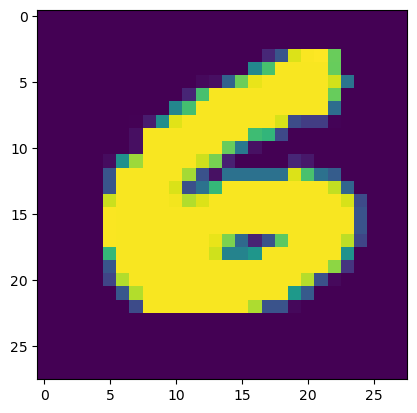

In [10]:
plt.imshow(img.squeeze())

In [11]:
label

6

Internally, this six is encoded in terms of 0's and 1's as a 10 item array, with the sixth slot a 1 and the rest 0.

In [12]:
label_array = np.zeros(10, dtype='int')
label_array[5] = 1
label_array

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

The cross-entropy loss (negative log-likelihood) is defined as:

$$\ell = \sum_n \ell_n = \sum_n - y_n \cdot log p_n = \sum_n -y_n \cdot log \left (\frac{e^{x_{n,c} \cdot y_n}}{\sum_c e^{x_{n,c}}} \right)$$

where log $p_n$ is a vector of 10 log probabilities, one for each digit, and $y_n$ is the vector with 0's and 1's corresponding to the current digit (here, `label_array` above). So you will see in this dot product (if u paid attention to the 3 blue 1 brown videos) will pick out the 6th probability for us, so you will get for the nth data item the loss:
$$\ell_n = - log\, p_{n,5} = - log (\frac{e^{x_{n,5}}}{\sum_ce^{x_{n,c}}} )$$,
where $x_{n, 5}$ is the fifth output of that layer of the neural network that has 10 outputs...the last layer.

So for example if the last layer x for item n was given as:

In [24]:
xn = torch.normal(0, 1, size = (10,))
xn

tensor([ 0.2133,  1.8563, -0.3545, -0.5105, -0.7530,  0.6498, -0.0851, -1.2621,
         1.5794, -1.2483])

In [25]:
pn = nn.Softmax()
pn(xn)

/Users/rahul/Courses/Hult/ml/nn_pytorch/.pixi/envs/default/lib/python3.11/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([0.0701, 0.3623, 0.0397, 0.0340, 0.0267, 0.1084, 0.0520, 0.0160, 0.2747,
        0.0162])

Notice these sum to 1 as probabilities must!

In [28]:
torch.sum(pn(xn))

tensor(1.0000)

Now you can dot product:

In [30]:
- label_array @ np.log( pn(xn).numpy() )

/Users/rahul/Courses/Hult/ml/nn_pytorch/.pixi/envs/default/lib/python3.11/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


2.2219114303588867

which takes the 6th element in the softmax: 0.1084, logs it to the base e and minuses it

In [31]:
import math
- math.log(0.1084)

2.2219271899765913